### Importing the Network Data

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from urllib import parse

In [3]:
# The list of all articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
articles = pd.read_csv("https://raw.githubusercontent.com/ebhtra/gory-graph/TF3/Wikispeedia/wikispeedia_paths-and-graph/articles.tsv", sep='\t', names = np.array(['article']), skiprows=12)

# decode UTF-8 special characters using urllib.parse.unquote()
articles['article'] = articles['article'].apply(lambda x: parse.unquote(x))

articles.head(10)

,article
0,Áedán_mac_Gabráin
1,Åland
2,Édouard_Manet
3,Éire
4,Óengus_I_of_the_Picts
5,€2_commemorative_coins
6,10th_century
7,11th_century
8,12th_century
9,13th_century


In [4]:
# Hierarchical categories of all articles.
# Many articles have more than one category. Some articles have no category.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
categories = pd.read_csv("https://raw.githubusercontent.com/ebhtra/gory-graph/TF3/Wikispeedia/wikispeedia_paths-and-graph/categories.tsv", sep='\t', names = np.array(['article', 'category']), skiprows=13)

# decode UTF-8 special characters using urllib.parse.unquote()
categories['article'] = categories['article'].apply(lambda x: parse.unquote(x))

categories.head(10)

,article,category
0,Áedán_mac_Gabráin,subject.History.British_History.British_Histor...
1,Áedán_mac_Gabráin,subject.People.Historical_figures
2,Åland,subject.Countries
3,Åland,subject.Geography.European_Geography.European_...
4,Édouard_Manet,subject.People.Artists
5,Éire,subject.Countries
6,Éire,subject.Geography.European_Geography.European_...
7,Óengus_I_of_the_Picts,subject.History.British_History.British_Histor...
8,Óengus_I_of_the_Picts,subject.People.Historical_figures
9,€2_commemorative_coins,subject.Business_Studies.Currency


In [5]:
# The list of all links between articles.
links = pd.read_csv("https://raw.githubusercontent.com/ebhtra/gory-graph/TF3/Wikispeedia/wikispeedia_paths-and-graph/links.tsv", sep='\t', names = np.array(['linkSource', 'linkTarget']), skiprows=12)

# decode UTF-8 special characters using urllib.parse.unquote()
links['linkSource'] = links['linkSource'].apply(lambda x: parse.unquote(x))
links['linkTarget'] = links['linkTarget'].apply(lambda x: parse.unquote(x))

links.head(10)

,linkSource,linkTarget
0,Áedán_mac_Gabráin,Bede
1,Áedán_mac_Gabráin,Columba
2,Áedán_mac_Gabráin,Dál_Riata
3,Áedán_mac_Gabráin,Great_Britain
4,Áedán_mac_Gabráin,Ireland
5,Áedán_mac_Gabráin,Isle_of_Man
6,Áedán_mac_Gabráin,Monarchy
7,Áedán_mac_Gabráin,Orkney
8,Áedán_mac_Gabráin,Picts
9,Áedán_mac_Gabráin,Scotland


In [6]:
# Successful (i.e., finished) Wikispeedia paths.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# Articles in a path are separated by ";".
# Back clicks are represented as "<".
# Ratings are optionally given by the user after finishing the game and range from 1 ("easy") to 5 ("brutal").
# Missing ratings are represented as "NULL".
paths_finished = pd.read_csv("https://raw.githubusercontent.com/ebhtra/gory-graph/TF3/Wikispeedia/wikispeedia_paths-and-graph/paths_finished.tsv", sep='\t', names = np.array(['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating']), skiprows=16)

# decode UTF-8 special characters using urllib.parse.unquote()
paths_finished['path'] = paths_finished['path'].apply(lambda x: parse.unquote(x))

paths_finished.head(10)

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
5,5295bca242be81fe,1372890414,110,14th_century;Europe;North_America;United_State...,NaN
6,36dabfa133b20e3c,1249525912,112,14th_century;China;Gunpowder;Fire,2.0
7,20418ff4797f96be,1229188046,139,14th_century;Time;Isaac_Newton;Light;Color;Rai...,1.0
8,08888b1b428dd90e,1232241510,74,14th_century;Time;Light;Rainbow,3.0
9,08888b1b428dd90e,1232241601,167,14th_century;15th_century;Plato;Nature;Ultravi...,NaN


In [7]:
# Unsuccessful (i.e., unfinished) Wikispeedia paths.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# Articles in a path are separated by ";".
# Back clicks are represented as "<".
# There are two types of quitting:
# (1) "timeout" means that no click was made for 30 minutes;
# (2) "restart" means that the user started a new game without finishing the current one.
paths_unfinished = pd.read_csv("https://raw.githubusercontent.com/ebhtra/gory-graph/TF3/Wikispeedia/wikispeedia_paths-and-graph/paths_unfinished.tsv", sep='\t', names = np.array(['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type']), skiprows=17)

# decode UTF-8 special characters using urllib.parse.unquote()
paths_unfinished['path'] = paths_unfinished['path'].apply(lambda x: parse.unquote(x))
paths_unfinished['target'] = paths_unfinished['target'].apply(lambda x: parse.unquote(x))

paths_unfinished.head(10)

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
5,131600803df4895e,1297100557,2009,Agriculture;History_of_the_world;China;Yangtze...,Grand_Canal_of_China,timeout
6,486bb79910fe9dd2,1297101660,1932,Mind;Christianity;Europe;Renaissance;Ancient_G...,Scouting,timeout
7,6d136e371e42474f,1297102070,175,4-2-0;United_States;Agriculture;Sugar;Australia,Cane_Toad,restart
8,6d136e371e42474f,1297102100,19,Logic,Moon_landing,restart
9,6d136e371e42474f,1297104110,2006,Logic;Computer_science;Science;Physical_scienc...,Moon_landing,timeout


In [8]:
# The shortest-path distances between all pairs of articles, computed using the Floyd-Warshall algorithm. (https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm)
# FORMAT:
# One row per article (the "source" of the shortest paths), in the same order as in articles.tsv.
# Each row contains the distances from the source to all articles (the "targets" of the shortest paths),
# again in the order of articles.tsv.
# The shortest-path distance is represented as a single digit, with no separators between values. This
# is possible because the longest shortest path happens to be of length 9.
# An underscore ("_") is used to indicate that the target cannot be reached from the source.
shortest_path = pd.read_csv("https://raw.githubusercontent.com/ebhtra/gory-graph/TF3/Wikispeedia/wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt", sep='\t', names = np.array(['path']), skiprows=17)

shortest_path.head(10)

,path
0,0_____33333325634333435_2433544334_3_422343544...
1,_0____22222325623232424_2422544324_3_312242544...
2,__0___33222425623232324_2333444433_3_422343434...
3,___0__33333325634233334_2433434333_2_423343433...
4,____0_22323335633332435_2433545434_3_423343544...
5,_____032223324523222324_2332544333_3_422333544...
6,______01222324523232423_2222544334_3_422232544...
7,______10111414512131334_1311544323_2_311131544...
8,______11011414512131324_1311544323_2_311131544...
9,______22101325623232434_2422545434_3_422242544...


In [9]:
# create reformatted shortest_path matrix to allow more informative analysis
# code source: https://stackoverflow.com/questions/43848680/pandas-split-dataframe-column-for-every-character
sp2 = shortest_path['path'].apply(lambda x: pd.Series(list(x)))

sp2

,0,1,2,3,4,5,6,7,8,9,...,4594,4595,4596,4597,4598,4599,4600,4601,4602,4603
0,0,_,_,_,_,_,3,3,3,3,...,4,3,3,4,4,3,4,4,4,2
1,_,0,_,_,_,_,2,2,2,2,...,4,2,3,4,4,3,4,3,3,3
2,_,_,0,_,_,_,3,3,2,2,...,4,3,2,3,4,3,4,3,3,3
3,_,_,_,0,_,_,3,3,3,3,...,4,2,2,3,4,3,4,4,3,3
4,_,_,_,_,0,_,2,2,3,2,...,4,2,3,4,4,3,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,_,_,_,_,_,_,2,2,2,2,...,3,2,2,3,3,0,3,3,3,2
4600,_,_,_,_,_,_,3,3,3,3,...,3,3,2,2,3,3,0,3,4,3
4601,_,_,_,_,_,_,2,2,2,2,...,3,2,2,3,4,3,3,0,3,3
4602,_,_,_,_,_,_,3,3,3,3,...,4,3,3,4,4,3,5,4,0,3


In [10]:
# Rename columns & provide a name for rows
sp_names = sp2.rename(columns=articles['article'], inplace=False)
sp_names = sp_names.rename(index=articles['article'], inplace=False)

sp_names

,Áedán_mac_Gabráin,Åland,Édouard_Manet,Éire,Óengus_I_of_the_Picts,€2_commemorative_coins,10th_century,11th_century,12th_century,13th_century,...,Ziad_Jarrah,Zimbabwe,Zinc,Zinc_chloride,Zion_National_Park,Zionism,Zirconium,Zoroaster,Zuid-Gelders,Zulu
Áedán_mac_Gabráin,0,_,_,_,_,_,3,3,3,3,...,4,3,3,4,4,3,4,4,4,2
Åland,_,0,_,_,_,_,2,2,2,2,...,4,2,3,4,4,3,4,3,3,3
Édouard_Manet,_,_,0,_,_,_,3,3,2,2,...,4,3,2,3,4,3,4,3,3,3
Éire,_,_,_,0,_,_,3,3,3,3,...,4,2,2,3,4,3,4,4,3,3
Óengus_I_of_the_Picts,_,_,_,_,0,_,2,2,3,2,...,4,2,3,4,4,3,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zionism,_,_,_,_,_,_,2,2,2,2,...,3,2,2,3,3,0,3,3,3,2
Zirconium,_,_,_,_,_,_,3,3,3,3,...,3,3,2,2,3,3,0,3,4,3
Zoroaster,_,_,_,_,_,_,2,2,2,2,...,3,2,2,3,4,3,3,0,3,3
Zuid-Gelders,_,_,_,_,_,_,3,3,3,3,...,4,3,3,4,4,3,5,4,0,3


In [11]:
# clean the data a bit, make the _ into NaN so we can make the remainder numeric
sp_names = sp_names.mask(sp_names == "_",np.nan)
# make numeric
sp_names = sp_names.apply(pd.to_numeric)

In [23]:
sp_names.head()

,Áedán_mac_Gabráin,Åland,Édouard_Manet,Éire,Óengus_I_of_the_Picts,€2_commemorative_coins,10th_century,11th_century,12th_century,13th_century,...,Ziad_Jarrah,Zimbabwe,Zinc,Zinc_chloride,Zion_National_Park,Zionism,Zirconium,Zoroaster,Zuid-Gelders,Zulu
Áedán_mac_Gabráin,0.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,...,4.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0
Åland,NaN,0.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,...,4.0,2.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0
Édouard_Manet,NaN,NaN,0.0,NaN,NaN,NaN,3.0,3.0,2.0,2.0,...,4.0,3.0,2.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0
Éire,NaN,NaN,NaN,0.0,NaN,NaN,3.0,3.0,3.0,3.0,...,4.0,2.0,2.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0
Óengus_I_of_the_Picts,NaN,NaN,NaN,NaN,0.0,NaN,2.0,2.0,3.0,2.0,...,4.0,2.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0


In [13]:
# pull all the articles with the shortest path connections
sp_names_1 = sp_names.stack()
sp_names_1 = sp_names_1[sp_names_1 ==1]
sp_names_1.to_frame()

0
Áedán_mac_Gabráin Bede            1.0
                  Columba         1.0
                  Dál_Riata       1.0
                  Great_Britain   1.0
                  Ireland         1.0
...                               ...
Zulu              South_Africa    1.0
                  Swaziland       1.0
                  United_Kingdom  1.0
                  Zambia          1.0
                  Zimbabwe        1.0

[119772 rows x 1 columns]

In [41]:
# Trying to build a DF with source, target, paths for graph building, but also for digging into distributions, etc.
# took way too long so I had to quit it, more than likely better code option
#data = pd.DataFrame([])
#for i in sp_names: 
#    for j in sp_names.columns:
#            data = data.append(pd.DataFrame({'source': i, 'target': j, 'path': sp_names[i][j]}, index=[0]), ignore_index=True)

KeyboardInterrupt: 

In [ ]:
data.head()

In [14]:
# Average distance 
#https://stackoverflow.com/questions/25140998/pandas-compute-mean-or-std-standard-deviation-over-entire-dataframe
avg = sp_names.stack().std()
print(avg)

0.8178214279338971


In [107]:
# Create nodes and edges from the array? hit rate limit
#stacked_list = sp_names.values.tolist()
#print(stacked_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [110]:
# Looking at page centrality based on Links?
links.head(10)

,linkSource,linkTarget
0,Áedán_mac_Gabráin,Bede
1,Áedán_mac_Gabráin,Columba
2,Áedán_mac_Gabráin,Dál_Riata
3,Áedán_mac_Gabráin,Great_Britain
4,Áedán_mac_Gabráin,Ireland
5,Áedán_mac_Gabráin,Isle_of_Man
6,Áedán_mac_Gabráin,Monarchy
7,Áedán_mac_Gabráin,Orkney
8,Áedán_mac_Gabráin,Picts
9,Áedán_mac_Gabráin,Scotland


In [111]:
G = nx.from_pandas_dataframe(links, source="linkSource", target="linkTarget")
                                 # edge_attr=["category"]) could join category set

In [112]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4592
Number of edges: 106647
Average degree:  46.4490


/Users/clairemeyer/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/clairemeyer/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/clairemeyer/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


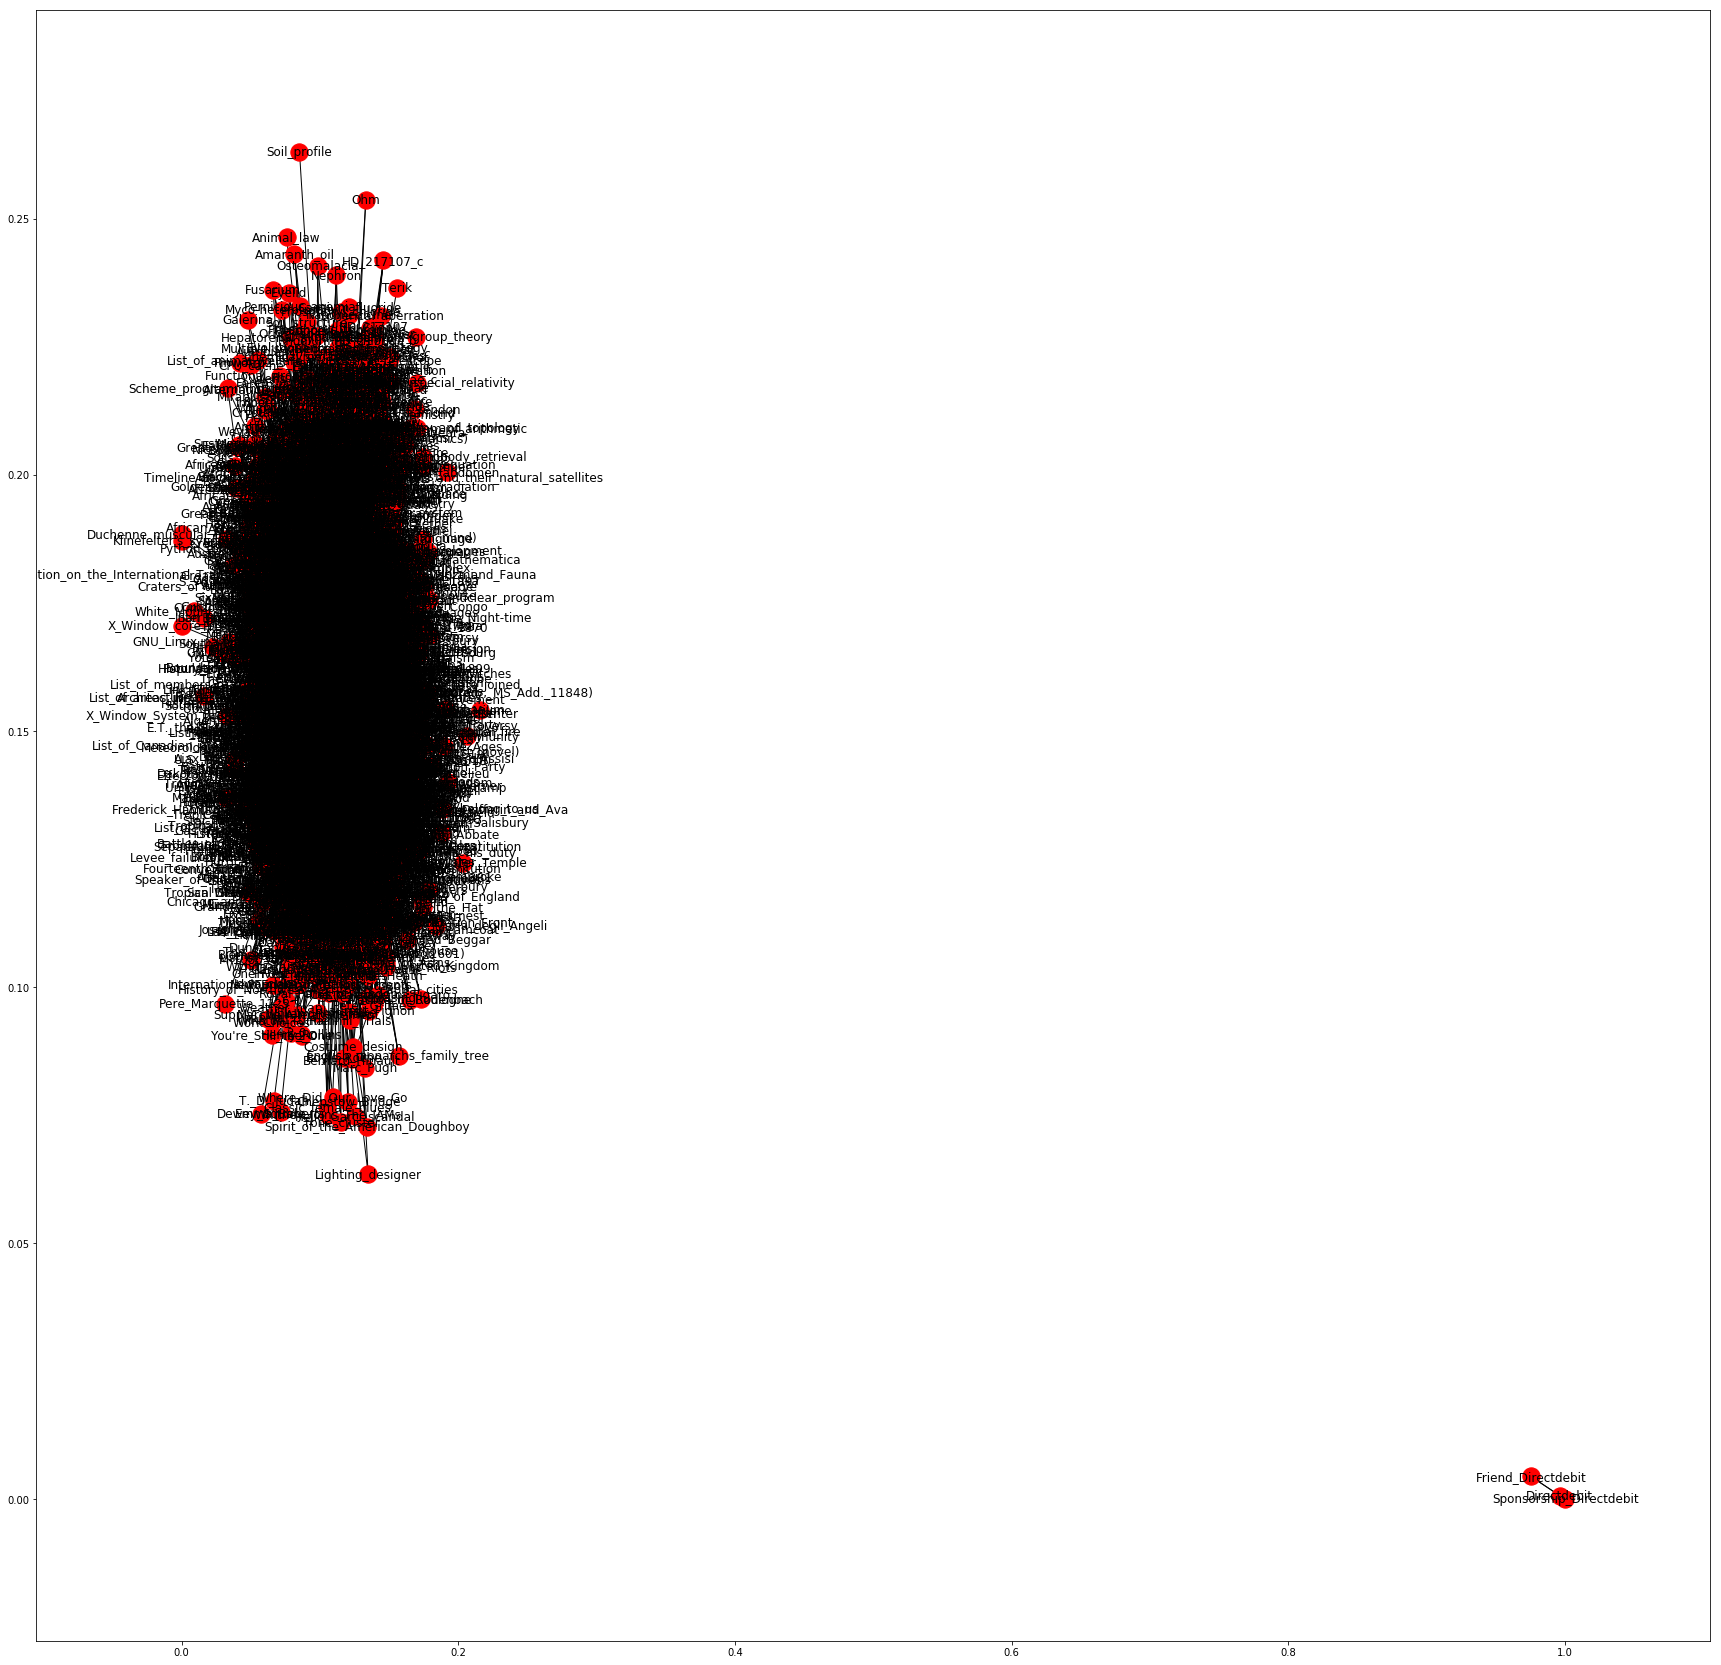

In [115]:
# takes a long time to run, huge graph
plt.figure(figsize = (30, 30))
ax = plt.subplot()

nx.draw_networkx(G, ax=ax)

In [116]:
def sorted_map(dd: dict) -> dict:
    """
    Sorts dict by its values (desc)
    
    :param dd: dictionary with numeric values
    :return sorted dictionary ordered by its numeric value
    """
    sorted_dict = sorted(dd.items(), key=lambda x: (-x[1], x[0]))
    sorted_dict = [(x[0], round(x[1], 2)) for x in sorted_dict]
    return sorted_dict

In [117]:
# takes a long time to run
d = nx.degree_centrality(G)
dsm = sorted_map(d)

c = nx.closeness_centrality(G)
csm = sorted_map(c)

b = nx.betweenness_centrality(G)
bsm = sorted_map(b)

ident1 = [x[0] for x in dsm[:15]]
ident2 = [x[0] for x in csm[:15]]
ident3 = [x[0] for x in bsm[:15]]
ident = list(set(ident1) | set(ident2) | set(ident3))

In [119]:
summary_df = pd.DataFrame({'GroupID': ident,
    'Degree Centrality': [d[i] for i in ident],
    'Closeness': [c[i] for i in ident], 
    'Betweenness': [b[i] for i in ident]})


summary_df['Sum Centrality'] = sum([summary_df['Degree Centrality'],
                                   summary_df.Closeness,
                                   summary_df.Betweenness])

print('\n\n================== Most Central Pages, ccGr[0] ================\n\n')
summary_df.sort_values(by='Sum Centrality', ascending=False)



================== Most Central Pages, ccGr[0] ================




,GroupID,Degree Centrality,Closeness,Betweenness,Sum Centrality
5,United_States,0.353082,0.600682,0.125216,1.078980
6,United_Kingdom,0.227837,0.556635,0.047387,0.831859
2,Europe,0.216728,0.552343,0.044658,0.813729
3,France,0.213243,0.548445,0.036809,0.798498
14,England,0.177739,0.530733,0.033597,0.742069
15,Germany,0.172947,0.535006,0.023128,0.731082
13,World_War_II,0.167937,0.531964,0.025565,0.725467
8,English_language,0.134611,0.522626,0.020216,0.677454
0,India,0.137225,0.524060,0.015803,0.677089
4,Japan,0.134176,0.522865,0.016671,0.673711
